In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from engine import ValueTensor
from visuals import draw_dot
from optim import SGD
from model import MLP

In [3]:
def mse(y, y_pred):
    return ((y - y_pred) ** 2).mean()

In [ ]:

def train_regression():

    from sklearn.datasets import fetch_california_housing
    from sklearn.preprocessing import StandardScaler

    # Load the dataset
    X, y = fetch_california_housing(return_X_y=True)
    y = y.reshape(-1, 1)  # make y a 2D array

    # Normalize features
    scaler_X = StandardScaler()
    X = scaler_X.fit_transform(X)


    # Convert to ValueTensor
    X_train = ValueTensor(np.array(X))
    y_train = ValueTensor(np.array(y))
    
    # Create model and optimizer
    model = MLP([X.shape[1], 32, 16, 1], activation="relu")
    optimizer = SGD(model.parameters(), lr=0.01)
    epochs = 100

    for epoch in range(epochs):
        # Forward
        preds = model(X_train)
        loss = mse(preds, y)

        # Backward
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f"Epoch {epoch} | Loss: {loss.data.item():.4f}")

    return loss

l = train_regression()


Epoch 0 | Loss: 3.8999
Epoch 10 | Loss: 1.6749
Epoch 20 | Loss: 1.1407
Epoch 30 | Loss: 0.9731
Epoch 40 | Loss: 0.8941
Epoch 50 | Loss: 0.8475
Epoch 60 | Loss: 0.8153
Epoch 70 | Loss: 0.7901
Epoch 80 | Loss: 0.7688
Epoch 90 | Loss: 0.7499


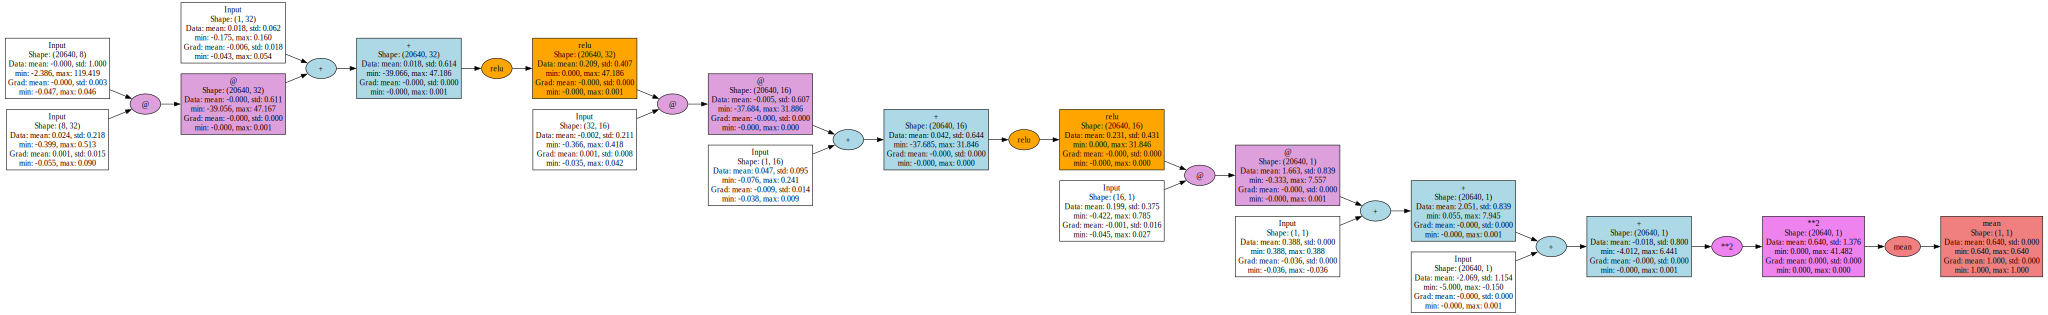

In [13]:
draw_dot(l)